# Bike Sharing Demand
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.


### 1. Install Packages and Data Inspection and Cleaning
Install packages and inspect the data set. Find if there are any null values. Using **.isnull() and .sum()** method. And check the data types 

In [114]:
pd.read_csv("data/SeoulBikeData.csv")

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [115]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bike_df = pd.read_csv("data/SeoulBikeData.csv", parse_dates = ['Date'])
print(bike_df.isnull().sum())
print(bike_df.dtypes)

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64
Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Function

Data is cleaned. Data types are correct. We are all set!

### 2. Coverage of the data set
What date min date and max date of the data set?

2017-01-12 00:00:00
2018-12-11 00:00:00

In [116]:
print(bike_df['Date'].min())
print(bike_df['Date'].max())
# The coverage of the data set is from December 1, 2017 to November 12, 2018


2017-01-12 00:00:00
2018-12-11 00:00:00


### 3. Demand of bikes per hour in normal day and holiday

As we can see, they have the same peak hours, 0000H, 0800H, and 1800H. Comparing the two graphs, the holiday graph have a continuous increasing from 0500H to 1800H. While the normal day graph have a decrease from 0800H to 1000H but it will continue to increase until 1800H.

And also, the total ride bike in Holiday is **215,895** and the total ride bike in Normal Day is **5,956,419**

5956419


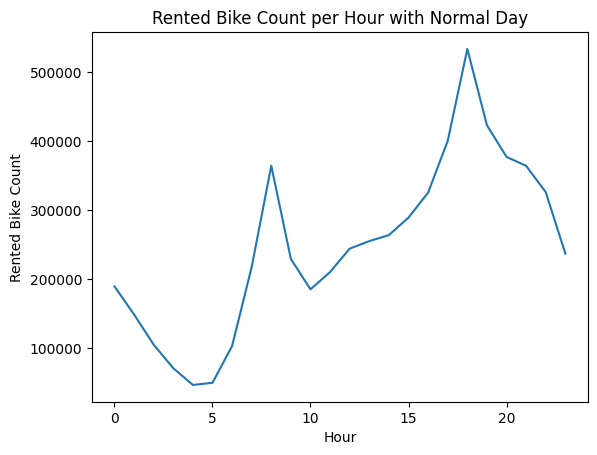

In [125]:
#subset the holiday and noholiday and also subset it
#no holiday
noholiday = bike_df[bike_df['Holiday'] == 'No Holiday']
print(noholiday['Rented Bike Count'].sum())
total_ride_noholiday = noholiday.groupby('Hour')['Rented Bike Count'].sum() \
                            .reset_index()

#plot
noholiday_graph = sns.lineplot(data = total_ride_noholiday, x = 'Hour', y = 'Rented Bike Count')
noholiday_graph.set_title('Rented Bike Count per Hour with Normal Day')
plt.show()

215895


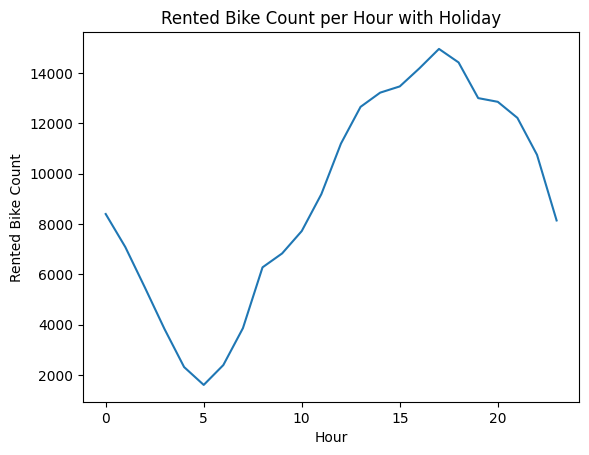

In [126]:
#holiday
holiday = bike_df[bike_df['Holiday'] == 'Holiday']
print(holiday['Rented Bike Count'].sum())
total_ride_holiday = holiday.groupby('Hour')['Rented Bike Count'].sum() \
                            .reset_index()

#plot
holiday_graph = sns.lineplot(data = total_ride_holiday, x = 'Hour', y = 'Rented Bike Count')
holiday_graph.set_title('Rented Bike Count per Hour with Holiday')
plt.show()

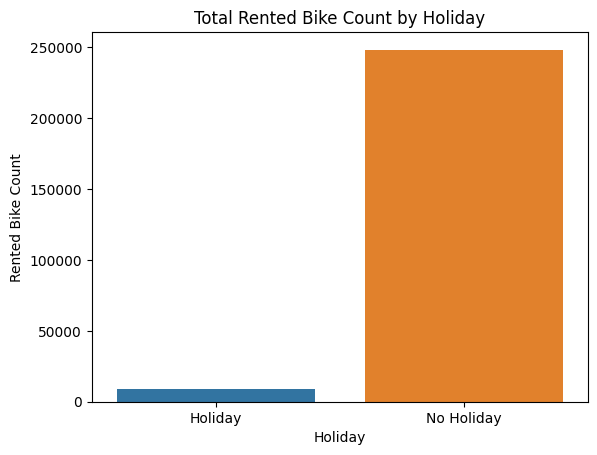

In [119]:
#create a bar chart to compare the total ride bike of holiday and no holiday
totalride = bike_df.groupby(['Hour', 'Holiday'])['Rented Bike Count'].sum() \
                        .reset_index()
bargraph_totalride = sns.barplot(data = totalride, x = 'Holiday', y = 'Rented Bike Count', errorbar = None)
bargraph_totalride.set_title('Total Rented Bike Count by Holiday')
plt.show()

As we can see, they have the same peak hours, 0000H, 0800H, and 1800H. Comparing the two graphs, the holiday graph have a continuous increasing from 0500H to 1800H. While the normal day graph have a decrease from 0800H to 1000H but it will continue to increase until 1800H.

And also, the total ride bike in Holiday is **215895** and the total ride bike in No Holiday is **5956419**

### 4. Comparing the demand of bike per season
Based on the line graph, we can see the pattern that they also have a same peak hours in different seasons. Summer has the highest total rented bike while Winter has the lowest.

['Autumn' 'Spring' 'Summer' 'Winter']


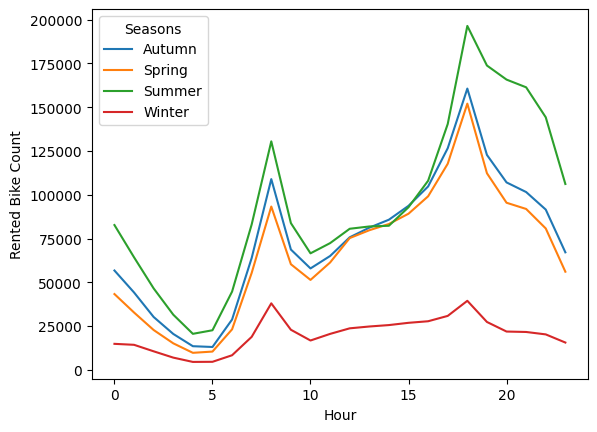

In [120]:
#Print all seasons to know if its equal to 4
print(np.unique(bike_df['Seasons']))

#plot it
seasons_groupby = bike_df.groupby(['Hour', 'Seasons'])['Rented Bike Count'].sum() \
                        .reset_index()
seasons_linegraph = sns.lineplot(data = seasons_groupby, x = 'Hour', y = 'Rented Bike Count', hue = 'Seasons')
plt.show()



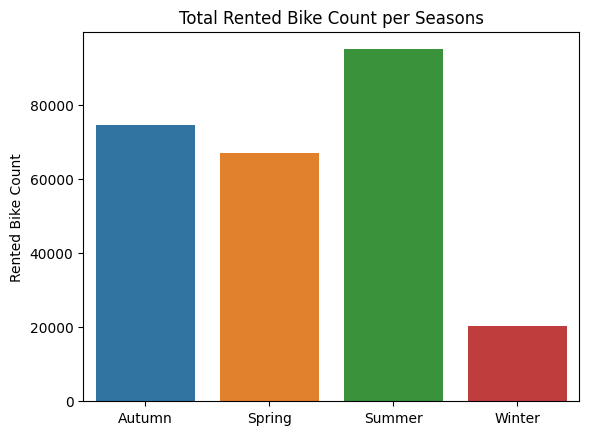

In [121]:
seasons_bargraph = sns.barplot(data = seasons_groupby, x = 'Seasons', y = 'Rented Bike Count', errorbar = None)
seasons_bargraph.set_title('Total Rented Bike Count per Seasons')
seasons_bargraph.set(xlabel = None)
plt.show()

### 5. Temperature affecting the bike business
As we saw in the scatter plot, if the temperature is low, especially in Winter, we have a low volume of costumer.

And we have a **strong positive correlation of 0.54**. Having this correlation means that if the temperature increases, the rented bike count also increases

[[1.         0.53855815]
 [0.53855815 1.        ]]


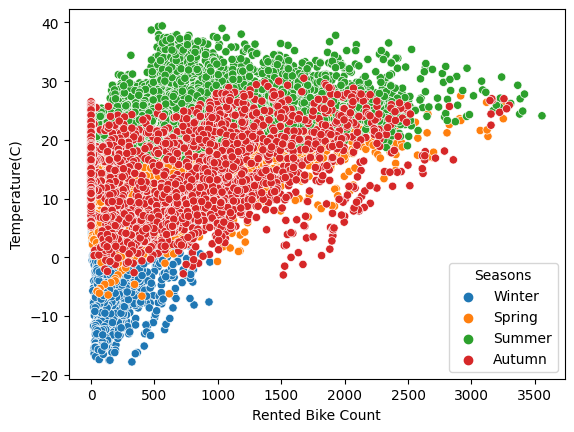

In [122]:
#make a scatter plot with rented bike count vs temperature with hue of seasons
temperature_graph = sns.scatterplot(data = bike_df, x = 'Rented Bike Count', y = 'Temperature(C)', hue = 'Seasons', )
bike_df_correlate = np.corrcoef(bike_df['Temperature(C)'], bike_df['Rented Bike Count'])
print(bike_df_correlate)
plt.show()

### 5.1 Windspeed vs Rented Bike Count
As we saw in the scatter plot, there are **weak positive correlation 0.12** in windspeed and rented bike count.

[[1.         0.12110845]
 [0.12110845 1.        ]]


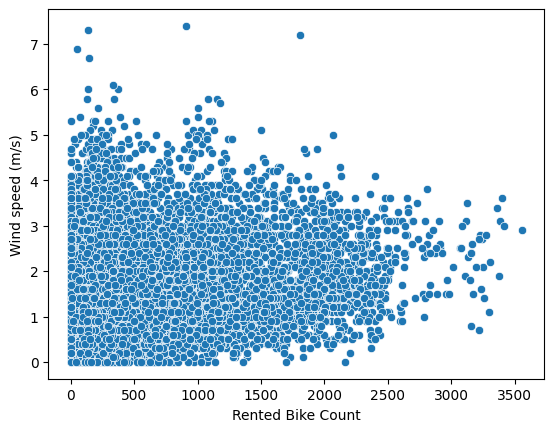

In [123]:
#make a scatter plot with rented bike count vs windspeed
windspeed_scatterplot = sns.scatterplot(data = bike_df, x = 'Rented Bike Count', y = 'Wind speed (m/s)')
windspeed_corr = np.corrcoef(bike_df['Rented Bike Count'], bike_df['Wind speed (m/s)'])
print(windspeed_corr)
plt.show()

### 6. Average Rented Bike Count per Day and per Seasons


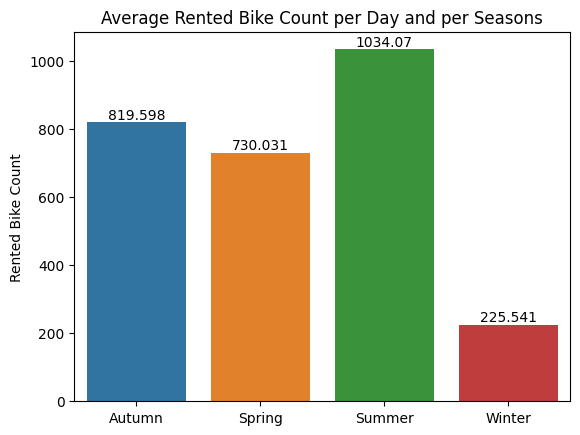

In [124]:
#get the average rented bike per day and per seasons
average_ridebike_seasons = bike_df.groupby('Seasons')['Rented Bike Count'].mean() \
                                .reset_index()
averidesea_bargraph = sns.barplot(data = average_ridebike_seasons, x = 'Seasons', y = 'Rented Bike Count')
averidesea_bargraph.set_title('Average Rented Bike Count per Day and per Seasons')
averidesea_bargraph.set(xlabel = None)
averidesea_bargraph.bar_label(averidesea_bargraph.containers[0])
plt.show()

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 

# END